#**RANDOM FORSETS**

###Importing libraries and dependancies 

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import digitfilter as df 
from sklearn.utils import shuffle

###Load *MNISTmini* dataset 
###+ filtering for digits 2 and 3

In [3]:
data_path = '../data/MNISTmini.mat'

digit1 = 2
digit2 = 3
rand_seed = 42

X_train_binary, y_train_binary, X_val_binary, y_val_binary, X_test_binary, y_test_binary = df.load_binary_digits(data_path, digit1, digit2, rand_seed)
print(f"Binary Classification (Digit 2 vs 3)")
print(f"Train shape: {X_train_binary.shape}, Class distribution: {np.bincount(y_train_binary)}")
print(f"Val shape: {X_val_binary.shape}, Class distribution: {np.bincount(y_val_binary)}")
print(f"Test shape: {X_test_binary.shape}, Class distribution: {np.bincount(y_test_binary)}")

Binary Classification (Digit 2 vs 3)
Train shape: (1000, 100), Class distribution: [500 500]
Val shape: (1000, 100), Class distribution: [500 500]
Test shape: (1000, 100), Class distribution: [500 500]


##Training Random Forest

In [11]:
n_trees_list = [10, 50, 100, 200, 15, 25, 30, 40]
train_errors = []
val_errors = []

for n_trees in n_trees_list:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train_binary, y_train_binary)
    
    y_train_pred = rf.predict(X_train_binary)
    y_val_pred = rf.predict(X_val_binary)
    
    train_errors.append(1 - accuracy_score(y_train_binary, y_train_pred))
    val_errors.append(1 - accuracy_score(y_val_binary, y_val_pred))
    
    print(f"n_estimators={n_trees}: Train Error={train_errors[-1]:.4f}, Val Error={val_errors[-1]:.4f}")

best_idx = np.argmin(val_errors)
best_n_trees = n_trees_list[best_idx]
print(f"Best n_estimators: {best_n_trees} (Validation Error={val_errors[best_idx]:.4f})")

n_estimators=10: Train Error=0.0010, Val Error=0.0380
n_estimators=50: Train Error=0.0000, Val Error=0.0330
n_estimators=100: Train Error=0.0000, Val Error=0.0360
n_estimators=200: Train Error=0.0000, Val Error=0.0370
n_estimators=15: Train Error=0.0000, Val Error=0.0410
n_estimators=25: Train Error=0.0000, Val Error=0.0330
n_estimators=30: Train Error=0.0000, Val Error=0.0360
n_estimators=40: Train Error=0.0000, Val Error=0.0320
Best n_estimators: 40 (Validation Error=0.0320)


##Training Final Random Forest

Test Accuracy: 0.9480, Test Error: 0.0520


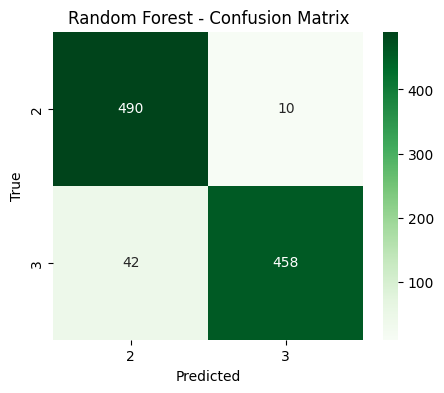

In [12]:
final_rf = RandomForestClassifier(n_estimators=best_n_trees, random_state=42)
final_rf.fit(X_train_binary, y_train_binary)

y_test_pred = final_rf.predict(X_test_binary)
test_acc = accuracy_score(y_test_binary, y_test_pred)
test_error = 1 - test_acc
print(f"Test Accuracy: {test_acc:.4f}, Test Error: {test_error:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_binary, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=[str(digit1), str(digit2)],
            yticklabels=[str(digit1), str(digit2)])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()